# Image Colorization

1. Adopt the implementation of the U-Net network from the previous task and train it on the task of image colorization.
2. Remove the skip connections of the implemented U-Net network, retrain it on the colorization task and examine the difference.

In [ ]:
import torch.nn as nn
from torchvision.transforms import CenterCrop
# Inspired by https://medium.com/analytics-vidhya/unet-implementation-in-pytorch-idiot-developer-da40d955f201
class u_net_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(u_net_block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, padding = 1)
        self.relu = nn.ReLU()
        self.batchnorm1 = nn.BatchNorm2d(out_channels)
        self.batchnorm2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x =self.relu(self.batchnorm1(self.conv1(x)))
        x = self.relu(self.batchnorm2(self.conv2(x)))
        return x


class encoder_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = u_net_block(in_channels, out_channels)
        self.pool = nn.MaxPool2d((2, 2))

    def forward(self, x):
        skip_conn = self.conv(x)
        out = self.pool(skip_conn)
        return out, skip_conn


class decoder_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2, padding=0)
        self.conv = u_net_block(out_channels + out_channels, out_channels)   

    def forward(self, x, skip_conn):
        x = self.up(x)
        x = torch.cat([x, skip_conn], axis=1)
        x = self.conv(x)
        return x


class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # define the neural network blocks for UNet
        # The implementation details of the network are listed in the paper: https://arxiv.org/pdf/1505.04597.pdf
        num_classes = 13
        self.enc_block1 = encoder_block(1, 64)
        self.enc_block2 = encoder_block(64, 128)
        self.enc_block3 = encoder_block(128, 256)
        self.enc_block4 = encoder_block(256, 512)
        self.enc_block5 = u_net_block(512, 1024)

        self.dec_block1 = decoder_block(1024, 512)
        self.dec_block2 = decoder_block(512, 256)
        self.dec_block3 = decoder_block(256, 128)
        self.dec_block4 = decoder_block(128, 64)
        self.out = nn.Conv2d(64, 3, kernel_size = 1, padding = 0)

        
    def forward(self, x):
        # Implement the forward pass+)
        x, skip1 = self.enc_block1(x)
        x, skip2 = self.enc_block2(x)
        x, skip3 = self.enc_block3(x)
        x, skip4 = self.enc_block4(x)
        x = self.enc_block5(x)
        x = self.dec_block1(x, skip4)
        x = self.dec_block2(x, skip3)
        x = self.dec_block3(x, skip2)
        x = self.dec_block4(x, skip1)
        x = self.out(x)
        return x

# Omitting skip connection

In [ ]:

class u_net_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(u_net_block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, padding = 1)
        self.relu = nn.ReLU()
        self.batchnorm1 = nn.BatchNorm2d(out_channels)
        self.batchnorm2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x =self.relu(self.batchnorm1(self.conv1(x)))
        x = self.relu(self.batchnorm2(self.conv2(x)))
        return x


class encoder_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv = u_net_block(in_channels, out_channels)
        self.pool = nn.MaxPool2d((2, 2))

    def forward(self, x):
        x = self.conv(x)
        out = self.pool(x)
        return out


class decoder_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2, padding=0)
        self.conv = u_net_block(out_channels, out_channels)   

    def forward(self, x):
        x = self.up(x)
        x = self.conv(x)
        return x


class UNet_skipless(nn.Module):
    def __init__(self):
        super(UNet_skipless, self).__init__()
        # define the neural network blocks for UNet
        # The implementation details of the network are listed in the paper: https://arxiv.org/pdf/1505.04597.pdf
        self.enc_block1 = encoder_block(1, 64)
        self.enc_block2 = encoder_block(64, 128)
        self.enc_block3 = encoder_block(128, 256)
        self.enc_block4 = encoder_block(256, 512)
        self.enc_block5 = u_net_block(512, 512)

        self.dec_block1 = decoder_block(512, 512)
        self.dec_block2 = decoder_block(512, 256)
        self.dec_block3 = decoder_block(256, 128)
        self.dec_block4 = decoder_block(128, 64)
        self.out = nn.Conv2d(64, 3, kernel_size = 1, padding = 0)

        
    def forward(self, x):
        # Implement the forward pass+)
        x = self.enc_block1(x)
        x = self.enc_block2(x)
        x = self.enc_block3(x)
        x = self.enc_block4(x)
        x = self.enc_block5(x)
        x = self.dec_block1(x)
        x = self.dec_block2(x)
        x = self.dec_block3(x)
        x = self.dec_block4(x)
        x = self.out(x)
        return x

## Download the dataset from google drive:

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown  --id 1gS35-TyG0EEcTGes-WtglcVl2Ij4WGT0
# use the other file id if the first one doesn't work
#!gdown  --id 1Q0UIc27o6qlFAqNiDKfM06KwpzHCGKLU
!unzip -q landscapes.zip -d ./data

## Colorization dataset

The dataset class loads the image and also converts them to a grayscale version. The image pair is then used for training.

In [ ]:
from torch.utils.data import Dataset, DataLoader
import glob
import cv2
import numpy as np

class ColorizationDataset(Dataset):

    def __init__(self, train=True):
        self.all_images = sorted(glob.glob("./data/*"))
        self.images = self.all_images[:-500]
        self.test_images = self.all_images[-500:]
        if not train:
          self.images = self.test_images

        self.resize_shape = (256, 256)

    def __len__(self):
        return len(self.images)

    def transform_image(self, image_path):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        channels=3
        image = cv2.resize(image, dsize=(self.resize_shape[1], self.resize_shape[0]))
        gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        image = np.array(image).reshape((image.shape[0], image.shape[1], channels)).astype(np.float32) / 255.0
        gray_image = np.array(gray_image).reshape((image.shape[0], image.shape[1], 1)).astype(np.float32) / 255.0

        image = np.transpose(image, (2, 0, 1))
        gray_image = np.transpose(gray_image, (2, 0, 1))
        return image, gray_image

    def __getitem__(self, idx):
        image, gray_image = self.transform_image(self.images[idx])
        sample = {'image': image, "gray_image": gray_image, 'idx': idx}

        return sample

## Examples of the training image pairs

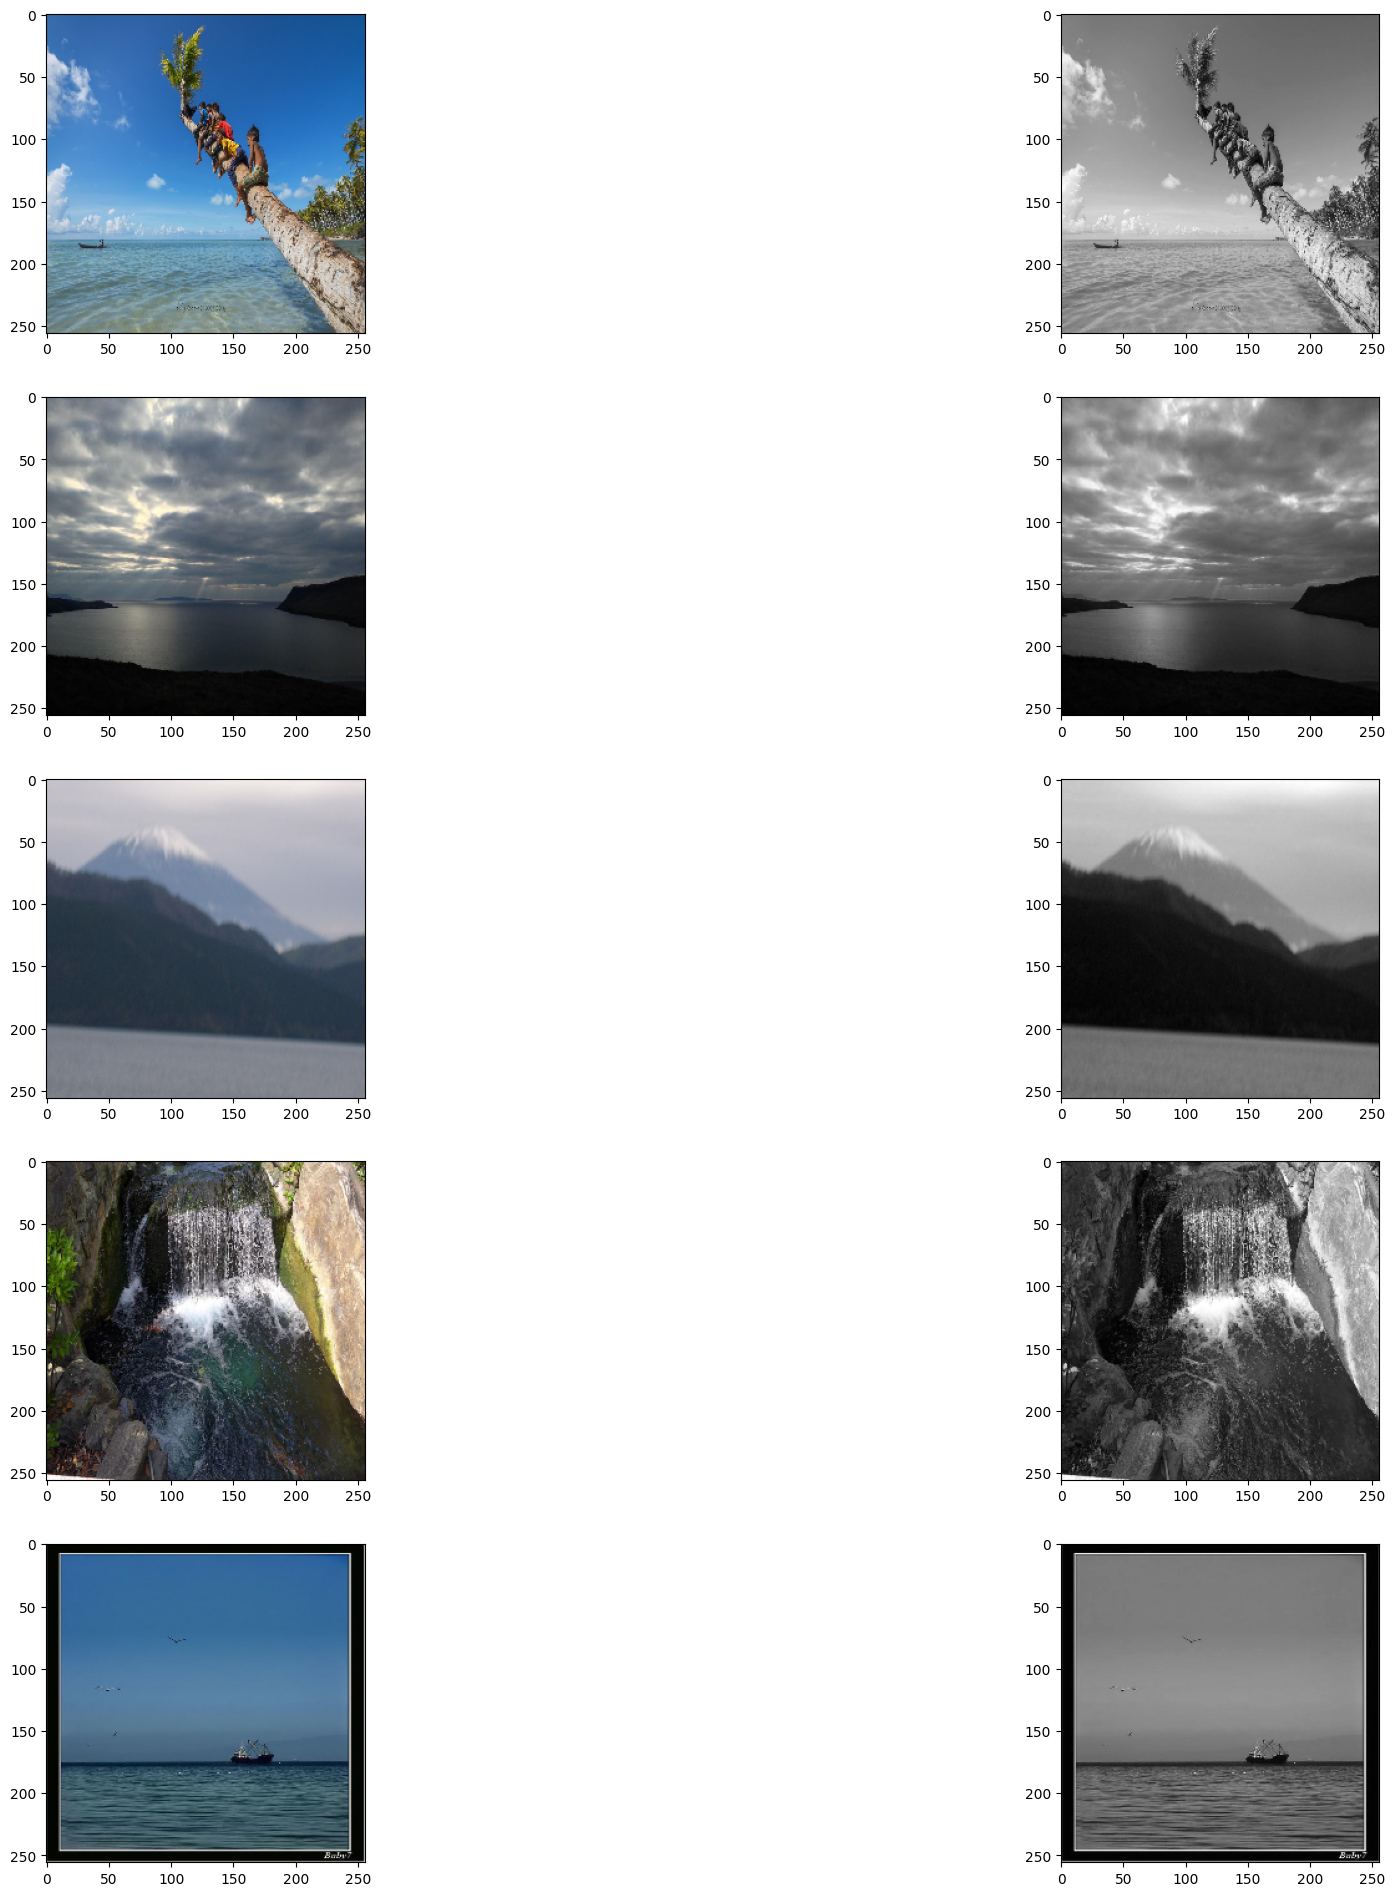

In [ ]:
import matplotlib.pyplot as plt
trainset = ColorizationDataset(train=True)
fig=plt.figure(figsize=(24, 24))
columns = 2
rows = 5
for i in range(rows):
  batch = trainset[np.random.randint(len(trainset))]
  img = batch['image'].transpose((1,2,0))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray = batch['gray_image'][0,:,:]
  fig.add_subplot(rows, columns, i*columns+1)
  plt.imshow(img)
  fig.add_subplot(rows, columns, i*columns+2)
  plt.imshow(gray,cmap='gray')
plt.show()


## Training loop


In [ ]:
import torch
from tqdm.notebook import tqdm


trainset = ColorizationDataset(train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = ColorizationDataset(train=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


import torch.optim as optim

net = UNet()
net.cuda()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

epochs=5
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    with tqdm(total=len(trainset), desc ='Epoch: '+str(epoch)+"/"+str(epochs), unit='img') as prog_bar:
      for i, data in enumerate(trainloader, 0):
          # get the inputs;
          gray_images = data["gray_image"]
          color_images = data["image"]

          # Get the inputs to the GPU
          gray_images = gray_images.cuda()
          color_images = color_images.cuda()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(gray_images)
          loss = nn.functional.l1_loss(outputs, color_images)
          loss.backward()
          optimizer.step()

          prog_bar.set_postfix(**{'loss': loss.data.cpu().detach().numpy()})
          prog_bar.update(4)


Epoch: 0/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 1/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 2/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 3/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 4/5:   0%|          | 0/3819 [00:00<?, ?img/s]

In [ ]:
import torch
from tqdm.notebook import tqdm


trainset = ColorizationDataset(train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = ColorizationDataset(train=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


import torch.optim as optim

net_skipless = UNet_skipless()
net_skipless.cuda()
optimizer = optim.Adam(net_skipless.parameters(), lr=0.0001)

epochs=5
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    with tqdm(total=len(trainset), desc ='Epoch: '+str(epoch)+"/"+str(epochs), unit='img') as prog_bar:
      for i, data in enumerate(trainloader, 0):
          # get the inputs;
          gray_images = data["gray_image"]
          color_images = data["image"]

          # Get the inputs to the GPU
          gray_images = gray_images.cuda()
          color_images = color_images.cuda()

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net_skipless(gray_images)
          loss = nn.functional.l1_loss(outputs, color_images)
          loss.backward()
          optimizer.step()

          prog_bar.set_postfix(**{'loss': loss.data.cpu().detach().numpy()})
          prog_bar.update(4)


Epoch: 0/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 1/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 2/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 3/5:   0%|          | 0/3819 [00:00<?, ?img/s]

Epoch: 4/5:   0%|          | 0/3819 [00:00<?, ?img/s]

## Display output examples from the test set

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

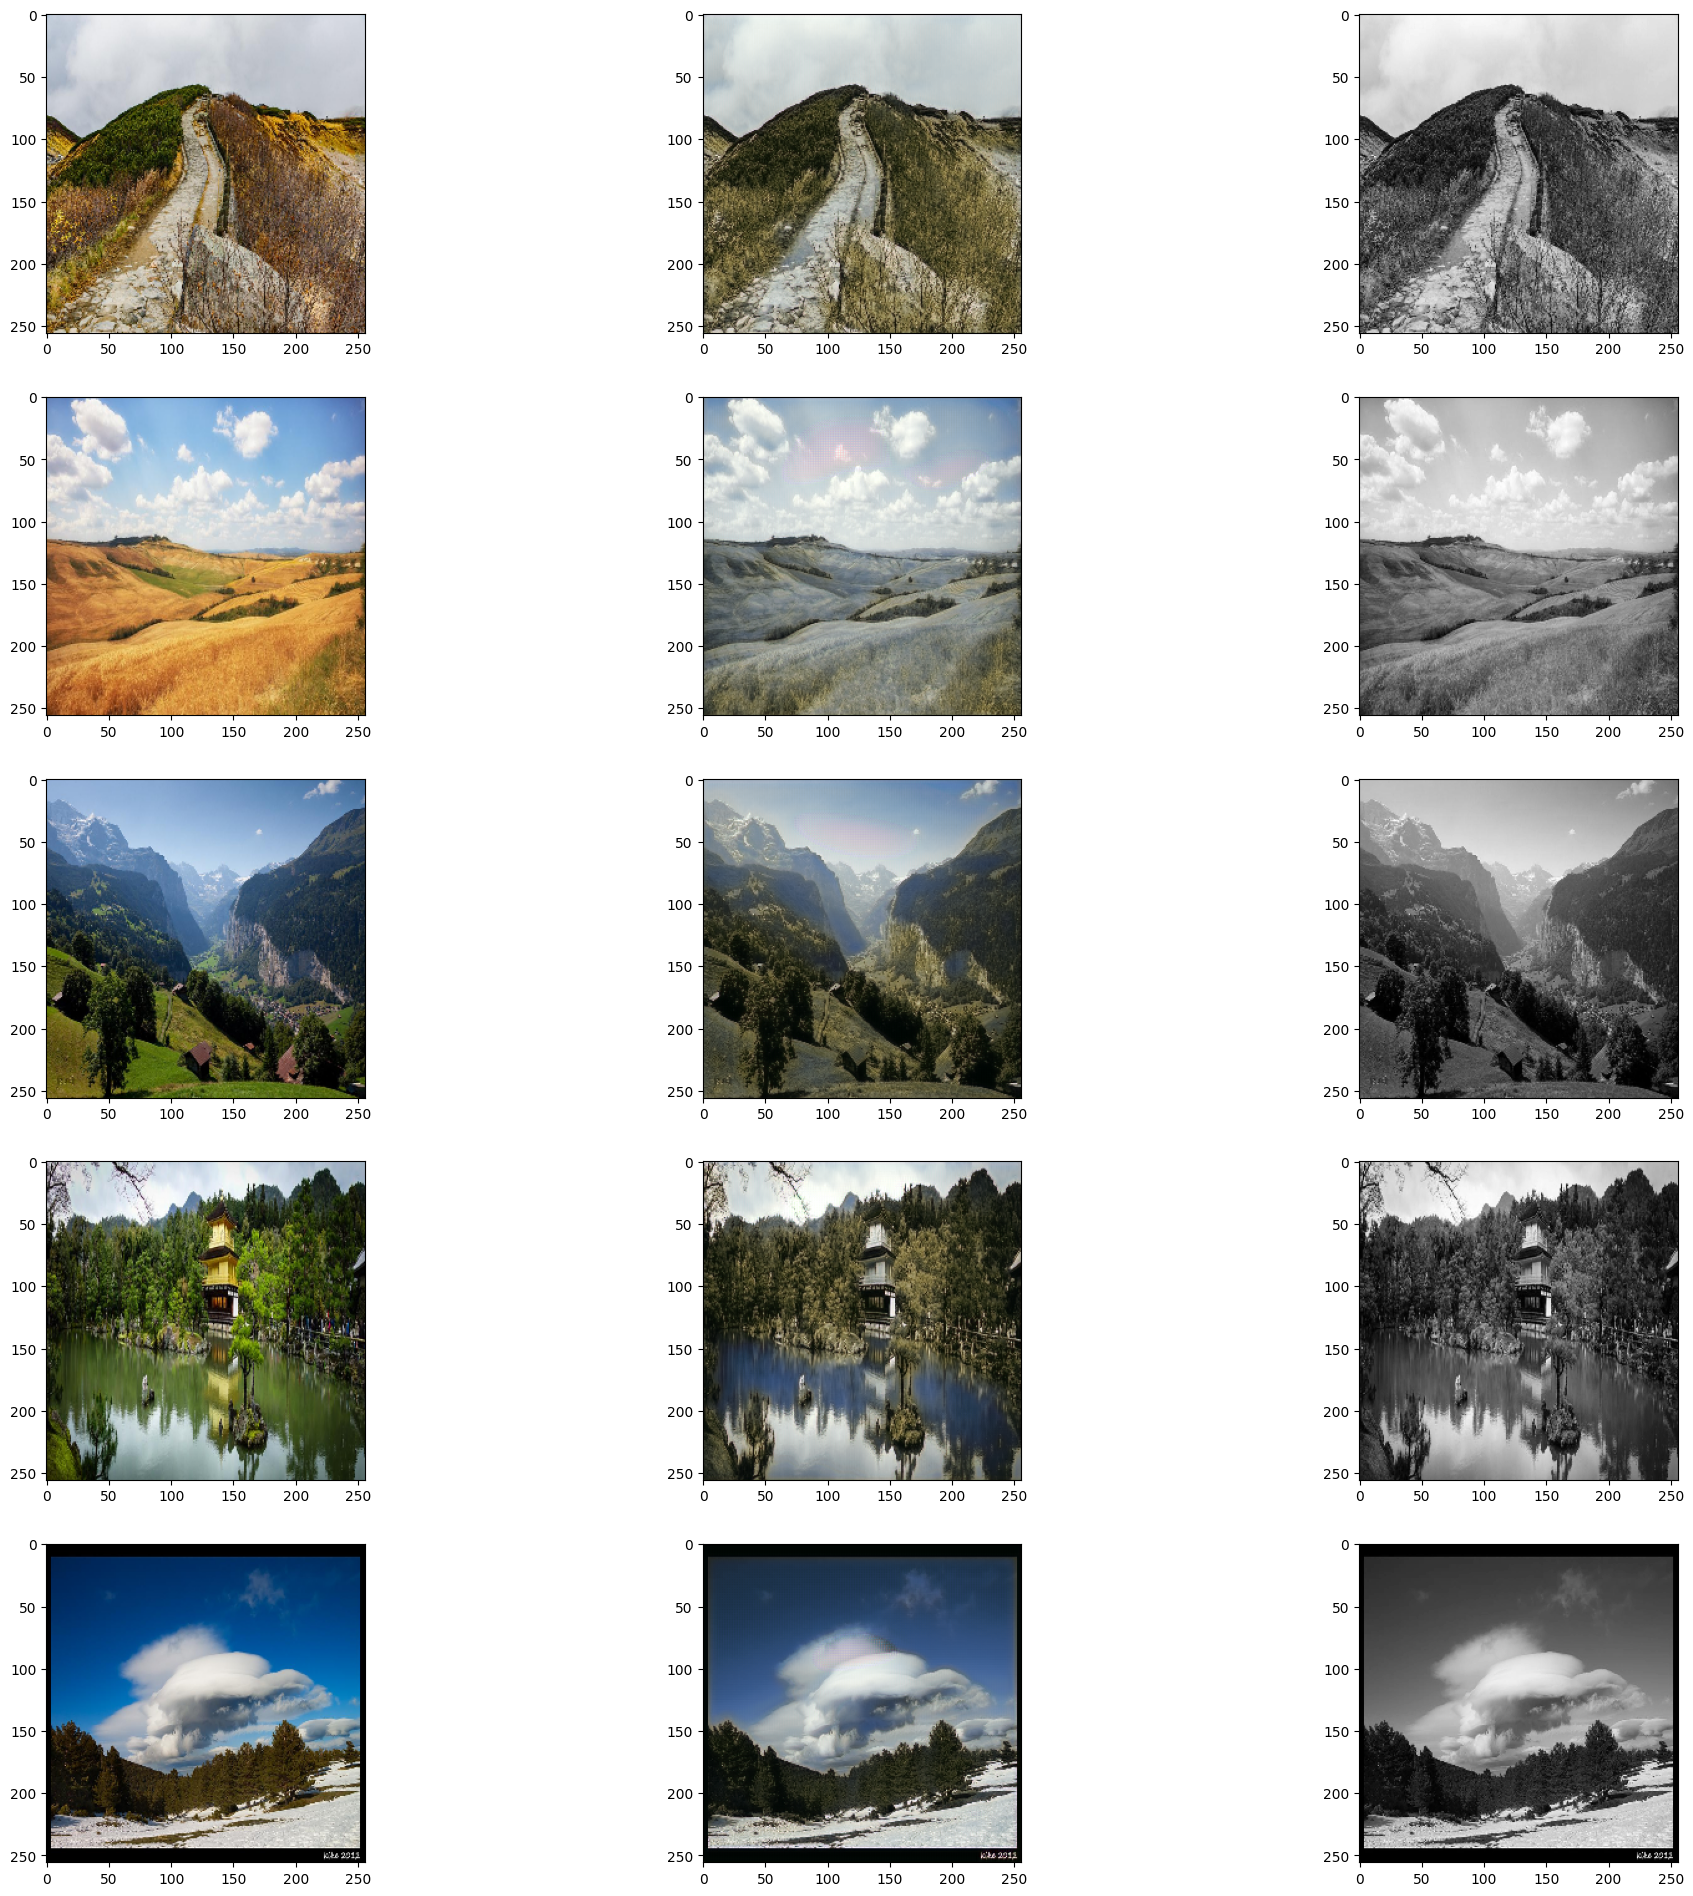

In [ ]:
from google.colab import files
# Show images with skip connections
net.eval()
fig=plt.figure(figsize=(24, 24))
columns = 3
rows = 5
for i in range(rows):
  batch = testset[i+90]
  img = batch['image']
  gray = batch['gray_image']
  img_tensor = torch.from_numpy(gray).cuda()
  img_tensor = img_tensor.unsqueeze(0)
  outputs = net(img_tensor)
  out_image = outputs[0,:,:,:].detach().cpu().numpy().transpose((1,2,0))
  out_image = cv2.cvtColor(out_image,cv2.COLOR_BGR2RGB)

  img=img.transpose((1,2,0))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray = gray[0,:,:]
  fig.add_subplot(rows, columns, i*columns+1)
  plt.imshow(img)
  fig.add_subplot(rows, columns, i*columns+2)
  plt.imshow(out_image)
  fig.add_subplot(rows, columns, i*columns+3)
  plt.imshow(gray,cmap='gray')

# Download the plots
plt.savefig("unet.jpg")
files.download("unet.jpg")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

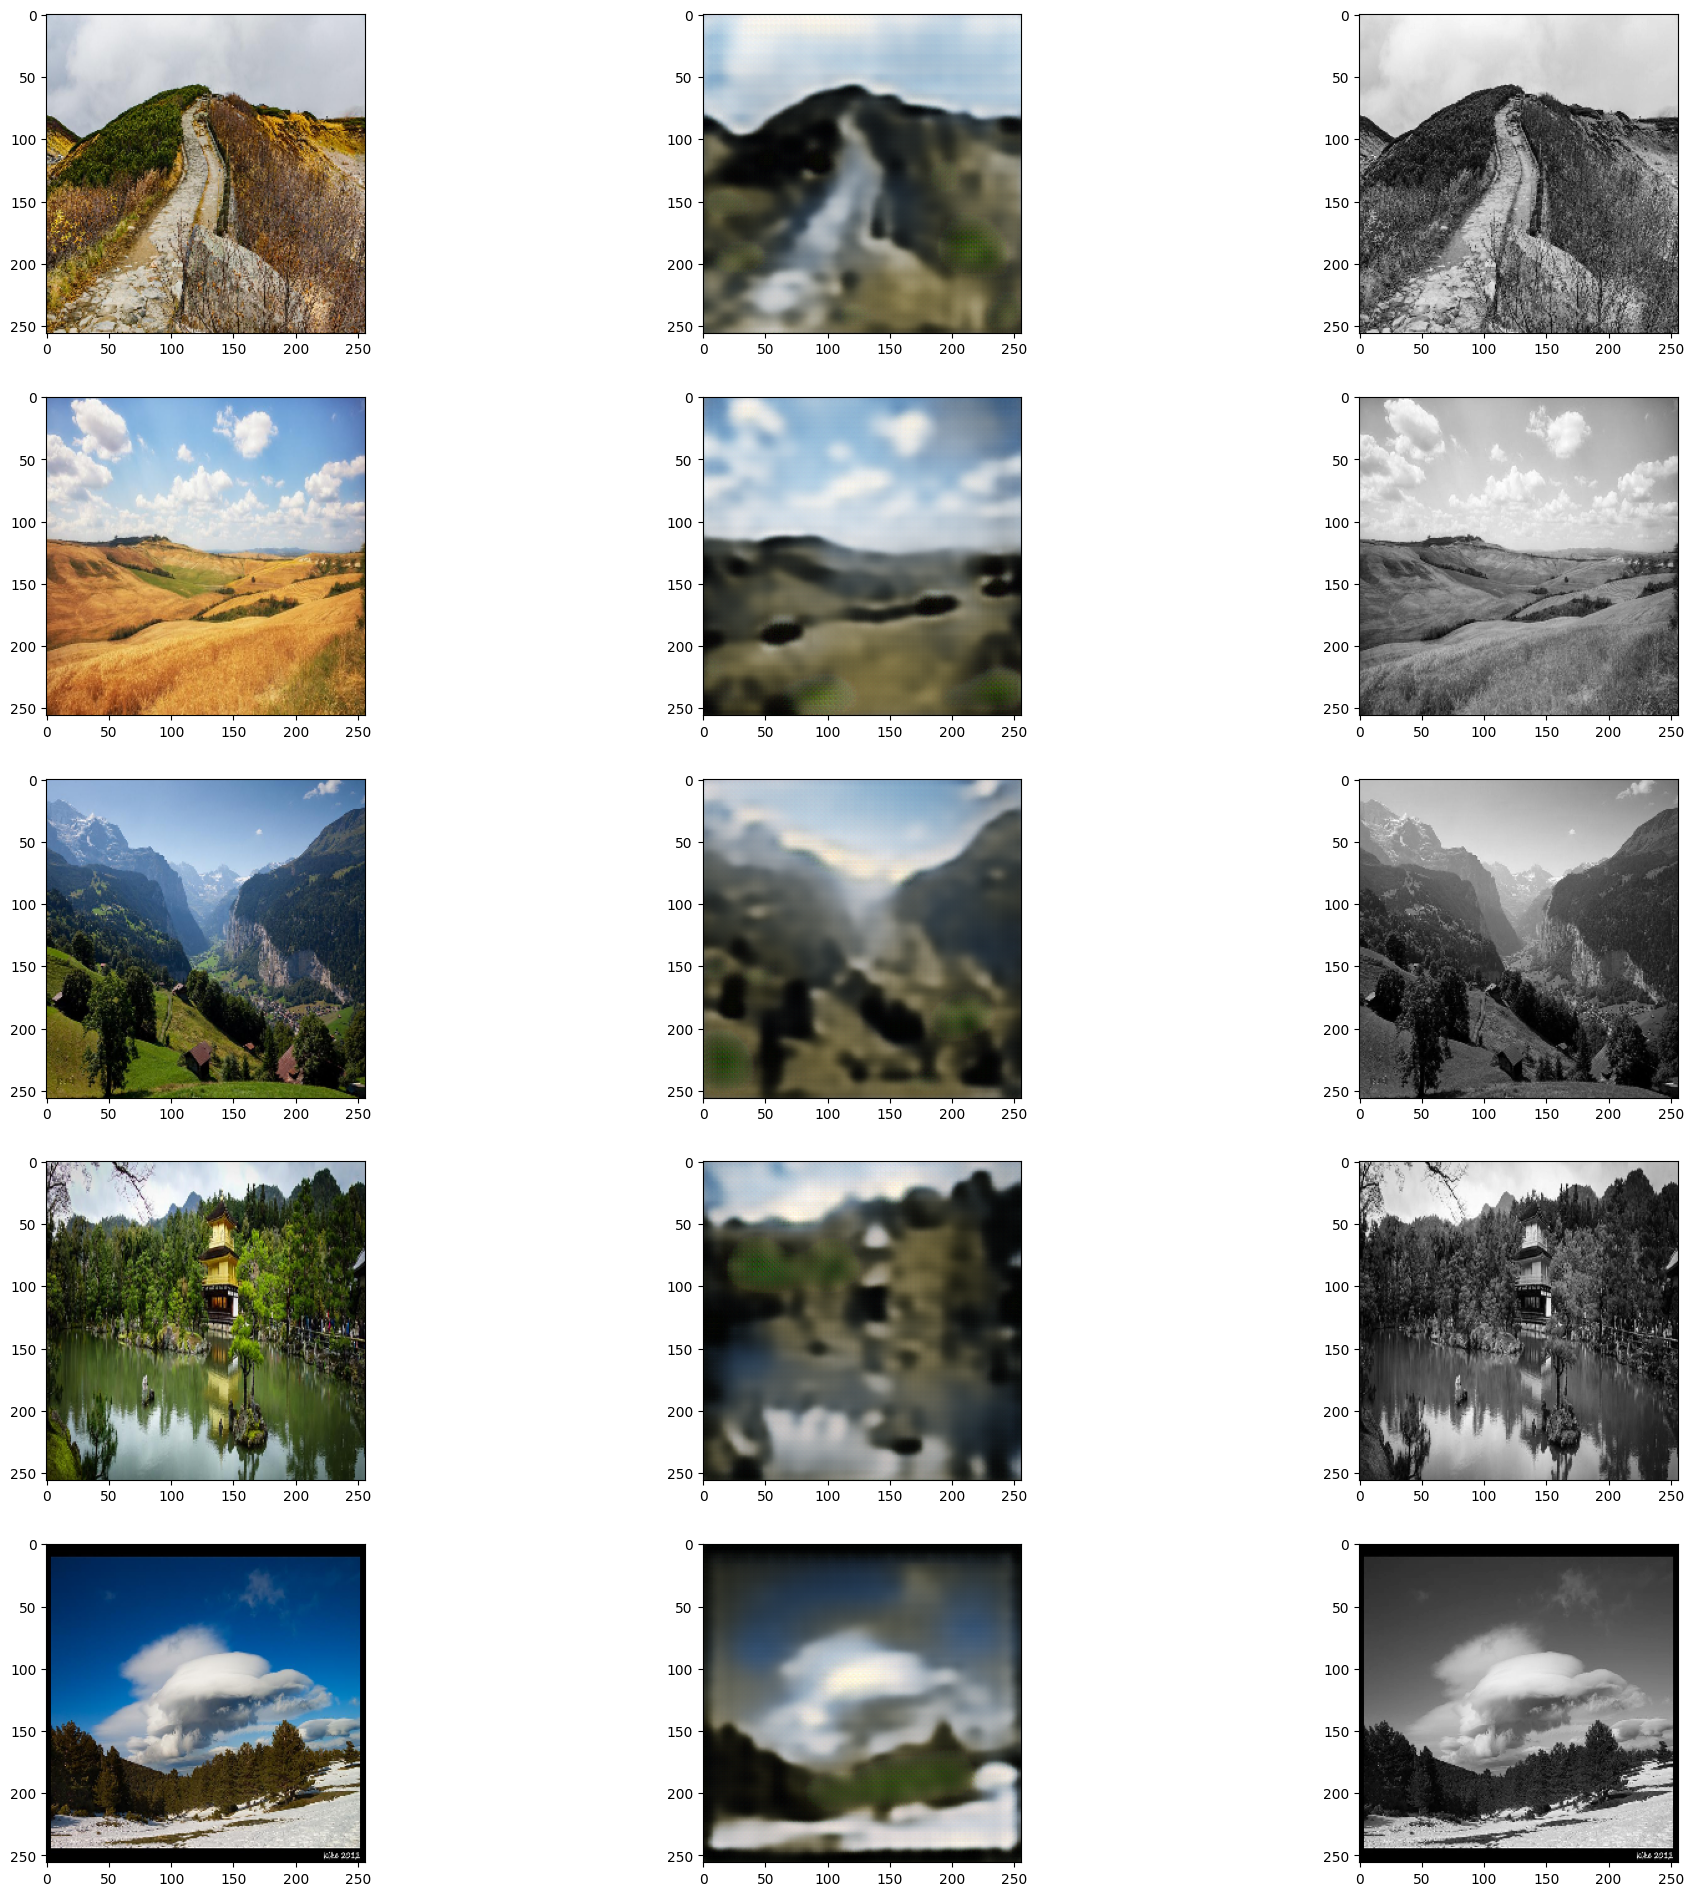

In [ ]:
from google.colab import files
# Show results without skip connections
net.eval()
fig=plt.figure(figsize=(24, 24))
columns = 3
rows = 5
for i in range(rows):
  batch = testset[i+80]
  img = batch['image']
  gray = batch['gray_image']
  img_tensor = torch.from_numpy(gray).cuda()
  img_tensor = img_tensor.unsqueeze(0)
  outputs = net_skipless(img_tensor)
  out_image = outputs[0,:,:,:].detach().cpu().numpy().transpose((1,2,0))
  out_image = cv2.cvtColor(out_image,cv2.COLOR_BGR2RGB)

  img=img.transpose((1,2,0))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray = gray[0,:,:]
  fig.add_subplot(rows, columns, i*columns+1)
  plt.imshow(img)
  fig.add_subplot(rows, columns, i*columns+2)
  plt.imshow(out_image)
  fig.add_subplot(rows, columns, i*columns+3)
  plt.imshow(gray,cmap='gray')

# Download the plots
plt.savefig("skipped.jpg")
files.download("skipped.jpg")
plt.show()